Case Study on Income Classifier

By : Simranjeet Singh

Aim : Building a Classification model to classify people According to their income in two groups       Either less than or equal to 50,000 and greater than  50,000

In [1]:
#Importing the important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
import joblib
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Changing the Working Directory
os.chdir("C:\\Users\\sjsin\\Desktop\\python projects")

In [3]:
# Loading the Dataset
data=pd.read_csv('income.csv')

In [4]:
data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [5]:
#Checking Datatype of each column
data.dtypes

age               int64
JobType          object
EdType           object
maritalstatus    object
occupation       object
relationship     object
race             object
gender           object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
nativecountry    object
SalStat          object
dtype: object

Checking Each Column for all Unique Values to findout and misclassified NaN values

In [6]:
np.unique(data['age'])

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 90], dtype=int64)

In [7]:
np.unique(data['SalStat'])

array([' greater than 50,000', ' less than or equal to 50,000'],
      dtype=object)

In [8]:
np.unique(data['JobType'])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

' ?' Found as misclassified Nan Value

In [9]:
np.unique(data['EdType'])

array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object)

In [10]:
np.unique(data['maritalstatus'])

array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated',
       ' Widowed'], dtype=object)

In [11]:
np.unique(data['occupation'])

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

' ?' Found as misclassified Nan Value

In [12]:
np.unique(data['relationship'])

array([' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
       ' Unmarried', ' Wife'], dtype=object)

In [13]:
np.unique(data['race'])

array([' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White'], dtype=object)

In [14]:
np.unique(data['gender'])

array([' Female', ' Male'], dtype=object)

In [15]:
np.unique(data['capitalgain'])

array([    0,   114,   401,   594,   914,   991,  1055,  1086,  1111,
        1151,  1173,  1409,  1424,  1455,  1471,  1506,  1639,  1797,
        1831,  1848,  2009,  2036,  2050,  2062,  2105,  2174,  2176,
        2202,  2228,  2290,  2329,  2346,  2354,  2387,  2407,  2414,
        2463,  2538,  2580,  2597,  2635,  2653,  2829,  2885,  2907,
        2936,  2961,  2964,  2977,  2993,  3103,  3137,  3273,  3325,
        3411,  3418,  3432,  3456,  3464,  3471,  3674,  3781,  3818,
        3887,  3908,  3942,  4064,  4101,  4386,  4416,  4508,  4650,
        4687,  4787,  4865,  4931,  4934,  5013,  5060,  5178,  5455,
        5556,  5721,  6097,  6360,  6418,  6497,  6514,  6723,  6767,
        6849,  7298,  7430,  7443,  7688,  7896,  7978,  8614,  9386,
        9562, 10520, 10566, 10605, 11678, 13550, 14084, 14344, 15020,
       15024, 15831, 18481, 20051, 22040, 25124, 25236, 27828, 34095,
       41310, 99999], dtype=int64)

In [16]:
np.unique(data['capitalloss'])

array([   0,  155,  213,  323,  419,  625,  653,  810,  880,  974, 1092,
       1138, 1258, 1340, 1380, 1408, 1411, 1485, 1504, 1539, 1564, 1573,
       1579, 1590, 1594, 1602, 1617, 1628, 1648, 1651, 1668, 1669, 1672,
       1719, 1721, 1726, 1735, 1740, 1741, 1755, 1762, 1816, 1825, 1844,
       1848, 1876, 1887, 1902, 1944, 1974, 1977, 1980, 2001, 2002, 2042,
       2051, 2057, 2080, 2129, 2149, 2163, 2174, 2179, 2201, 2205, 2206,
       2231, 2238, 2246, 2258, 2267, 2282, 2339, 2352, 2377, 2392, 2415,
       2444, 2457, 2467, 2472, 2489, 2547, 2559, 2603, 2754, 2824, 3004,
       3683, 3770, 3900, 4356], dtype=int64)

In [17]:
np.unique(data['hoursperweek'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 94, 95, 96, 97, 98, 99], dtype=int64)

In [18]:
np.unique(data['nativecountry'])

array([' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
       ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India',
       ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos',
       ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru',
       ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico',
       ' Scotland', ' South', ' Taiwan', ' Thailand', ' Trinadad&Tobago',
       ' United-States', ' Vietnam', ' Yugoslavia'], dtype=object)

In [19]:
np.unique(data['SalStat'])

array([' greater than 50,000', ' less than or equal to 50,000'],
      dtype=object)

Loading the Dataset with ' ?' as NaN value

In [20]:
data=pd.read_csv('income.csv',na_values=[' ?'])

In [21]:
# Dropping NaN values
data.dropna(inplace=True)

In [22]:
np.unique(data['JobType'])

array([' Federal-gov', ' Local-gov', ' Private', ' Self-emp-inc',
       ' Self-emp-not-inc', ' State-gov', ' Without-pay'], dtype=object)

In [23]:
np.unique(data['occupation'])

array([' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

Comparing Each Independent Variable with Dependent Varibale

Age vs Salary


<AxesSubplot:xlabel='SalStat', ylabel='age'>

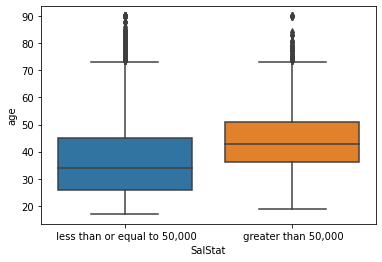

In [24]:
sns.boxplot(y=data['age'],x=data['SalStat'])

JobType vs Salary

<AxesSubplot:xlabel='count', ylabel='JobType'>

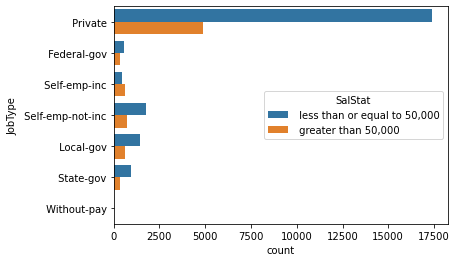

In [25]:
sns.countplot(y=data['JobType'],hue=data['SalStat'])

EdType vs Salary

<AxesSubplot:xlabel='count', ylabel='EdType'>

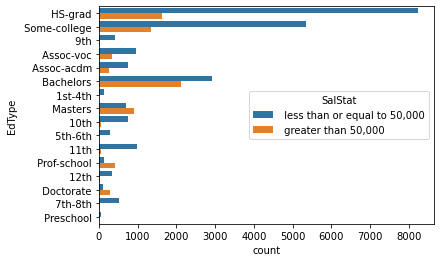

In [26]:
sns.countplot(y=data['EdType'],hue=data['SalStat'])

Occupation vs Salary

<AxesSubplot:xlabel='count', ylabel='occupation'>

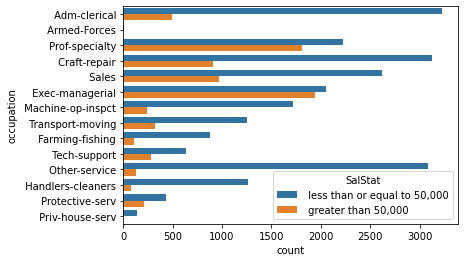

In [27]:
sns.countplot(y=data['occupation'],hue=data['SalStat'])

Marital Status vs Salary

<AxesSubplot:xlabel='count', ylabel='maritalstatus'>

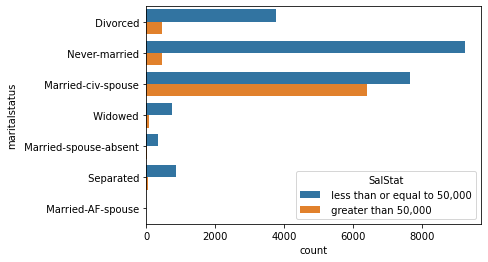

In [28]:
sns.countplot(y=data['maritalstatus'],hue=data['SalStat'])

Relationship vs Salary

<AxesSubplot:xlabel='count', ylabel='relationship'>

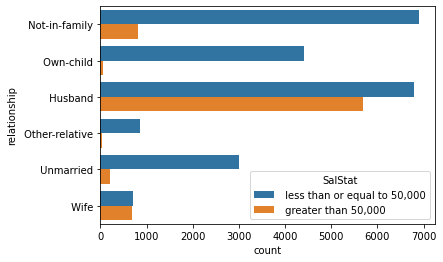

In [29]:
sns.countplot(y=data['relationship'],hue=data['SalStat'])

Race vs Salary


<AxesSubplot:xlabel='count', ylabel='race'>

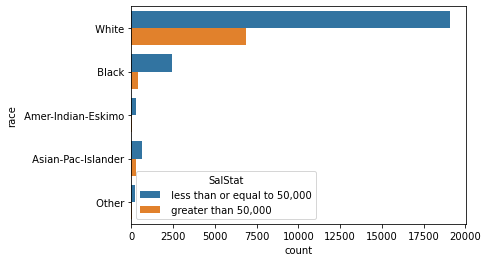

In [30]:
sns.countplot(y=data['race'],hue=data['SalStat'])

Gender vs Salary

<AxesSubplot:xlabel='count', ylabel='gender'>

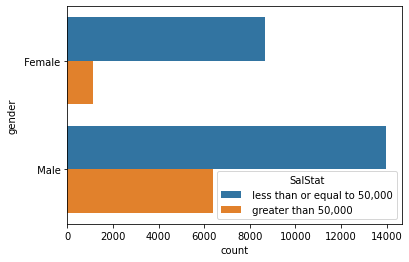

In [31]:
sns.countplot(y=data['gender'],hue=data['SalStat'])

Capitalgain vs Salary

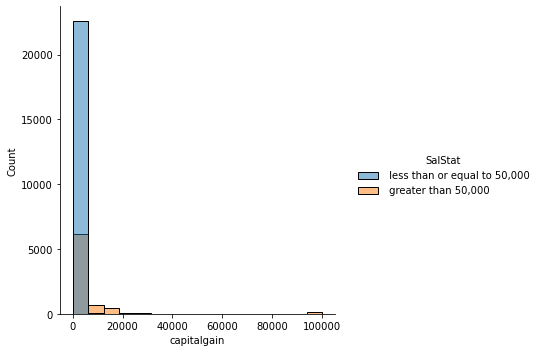

In [32]:
sns.displot(x=data['capitalgain'],hue=data["SalStat"])

Capitalloss vs Salary

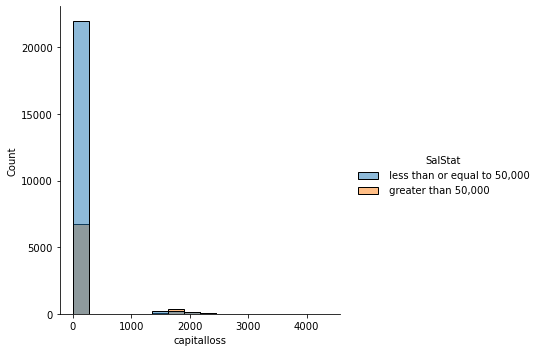

In [33]:
sns.displot(x=data['capitalloss'],hue=data['SalStat'])

Hoursperweek vs Salary

<AxesSubplot:ylabel='hoursperweek'>

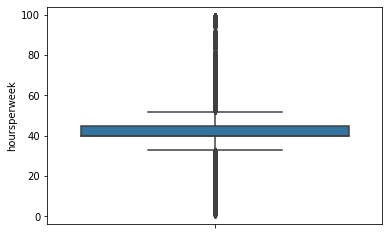

In [34]:
sns.boxplot(y=data['hoursperweek'],hue=data['SalStat'])

In [35]:
# Assigning 0 and 1 to less than or equal to 50,000 and greater than 50,000 respectively
data['SalStat']= data['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1}) 

In [36]:
np.unique(data['SalStat'])

array([0, 1], dtype=int64)

Seperating  Independent Variable and Dependent Varibale

In [37]:
x=data.drop(columns=['SalStat'])

In [38]:
y=data.drop(columns=['age','JobType','EdType','maritalstatus','occupation','relationship','race','gender','capitalgain','capitalloss','hoursperweek','nativecountry',])

In [39]:
y

,SalStat
0,0
1,0
2,1
3,0
4,0
...,...
31973,0
31974,0
31975,0
31976,0


Converting Independent Variables into Dummy Variable 

In [40]:
X=pd.get_dummies(x)

In [41]:
X

,age,capitalgain,capitalloss,hoursperweek,JobType_ Federal-gov,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31974,34,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31975,23,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31976,42,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
# Splitting the Data into Train and Test sets
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)

In [43]:
# Building the Logistic Regression Model
model=lm.LogisticRegression(max_iter=9999)

In [44]:
x_train

,age,capitalgain,capitalloss,hoursperweek,JobType_ Federal-gov,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
18659,21,0,0,10,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
21862,43,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29626,41,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8608,58,0,0,45,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24879,31,3908,0,50,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18322,21,0,0,20,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5547,59,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12921,28,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
257,36,0,0,50,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
y_train

,SalStat
18659,0
21862,0
29626,0
8608,0
24879,0
...,...
18322,0
5547,0
12921,1
257,0


In [46]:
x_test

,age,capitalgain,capitalloss,hoursperweek,JobType_ Federal-gov,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
12260,35,0,0,38,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5040,44,0,0,20,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8459,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15180,23,2202,0,80,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13307,33,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260,37,0,0,45,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18498,18,0,0,20,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18984,59,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27184,20,0,0,52,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
y_test

,SalStat
12260,0
5040,1
8459,0
15180,0
13307,1
...,...
4260,0
18498,0
18984,1
27184,0


In [48]:
y_train=np.ravel(y_train)

In [49]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=9999)

In [50]:
y_pred=model.predict(x_test)

In [51]:
accuracy_score_reg=accuracy_score(y_test,y_pred)

In [52]:
accuracy_score_reg

0.8455035225859926

Removing Insignificant Variables(Gender,Native country,Race,Job Type)

In [53]:
cols=['gender','race','JobType','nativecountry']
new_data=data.drop(cols,axis=1)

In [54]:
new_x=new_data.drop(columns=["SalStat"])

In [55]:
new_X=pd.get_dummies(new_x)

In [56]:
new_x_train,new_x_test,new_y_train,new_y_test=train_test_split(new_X,y,test_size=0.4,random_state=1)

In [57]:
new_y_train=np.ravel(new_y_train)

In [58]:
model.fit(new_x_train,new_y_train)

LogisticRegression(max_iter=9999)

In [59]:
y_pred_new=model.predict(new_x_test)

In [60]:
accuracy_score_reg_new=accuracy_score(new_y_test,y_pred_new)

In [61]:
accuracy_score_reg_new

0.8440944881889764

KNN model

In [62]:
Knn_Classifier=KNeighborsClassifier(n_neighbors=16)

KNN Model Before Removing Insingnificant Variables

In [63]:
Knn_Classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=16)

In [64]:
y_pred_knn=Knn_Classifier.predict(x_test)

In [65]:
accuracy_score_knn=accuracy_score(y_test,y_pred_knn)

In [66]:
accuracy_score_knn

0.8390385412349772

KNN Model After Removing Insignificant Variables

In [67]:
Knn_Classifier.fit(new_x_train,new_y_train)

KNeighborsClassifier(n_neighbors=16)

In [68]:
y_pred_knn_new=Knn_Classifier.predict(new_x_test)

In [69]:
accuracy_score_knn_new=accuracy_score(new_y_test,y_pred_knn_new)

In [70]:
accuracy_score_knn

0.8390385412349772

 Accuracy of Regression model before Removing Insignificant Variables is 84.5 %,
           

 Accuracy of Regression model After Removing Insignificant Variables is 84.4 %

Accuracy of KNN model before Removing Insignificant Variables is 83.9 %

Accuracy of KNN model After Removing Insignificant Variables is 83.9 %

Conclusion: We would be using Regression model after Removing Insignificant Variables